Exploratory data analysis is a data exploration technique to understand the various aspects of the data. It is a kind of summary of data. It is one of the most important steps before performing any machine learning or deep learning tasks.

https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/

https://www.analyticsvidhya.com/blog/2021/06/eda-exploratory-data-analysis-with-python/

https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/

Load CSV Files
Dataset Information
Data Cleaning / Wrangling
Group by names
Summary of statistics
Skewness and kurtosis
Categorical Variable Move
Create Dummy Variables

## FOCUSED ##
Univariate Analysis
Distribution of the variables / features
Bivariate Analysis
Multivariate Analysis
Correlation

data link: https://archive.ics.uci.edu/ml/datasets/auto+mpg

Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes."

https://www.geeksforgeeks.org/instance-based-learning/

Some of the instance-based learning algorithms are :

K Nearest Neighbor (KNN)
Self-Organizing Map (SOM)
Learning Vector Quantization (LVQ)
Locally Weighted Learning (LWL)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import os
os.chdir('C:/Users/AbinSRajan/OneDrive - Enquero/Desktop/Project/Gen_Notebook')

## 1. Load CSV Files ##

In [2]:
df_cars = pd.read_csv("auto-mpg.csv")
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 2. Dataset Information ##

In [3]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_cars.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## 3. Data Cleaning/Wrangling ##

In [4]:
df_cars['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

## Sample Format ##
a=[1,2,'w',2,3,4,'j']
other_data_capture=[]
for element in a:
    try:
        element=int(element)
        if type(element)==int:
            continue
    except ValueError:
        other_data_capture.append(element)      

In [5]:
### Function to filter other datatype elements in a Column / Variable ###
def mixed_dtype_catcher(df_cars,var,dtype):
    list_input=list(df_cars[var].unique())
    other_data_capture=[]
    for element in list_input:
        try:
            element=dtype(element)
            if type(element)==dtype:
                continue
        except ValueError:
            other_data_capture.append(element) 
    return other_data_capture
mixed_dtype_catcher(df_cars,'horsepower',dtype=int)

['?']

### 4. Groupby Names ###

In [6]:
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)
df_cars.horsepower = df_cars.horsepower.astype(int)
print("######################################################################")
print("          After Cleaning and type covertion in the Data Set")
print("######################################################################")
df_cars.info()

######################################################################
          After Cleaning and type covertion in the Data Set
######################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


<ipython-input-6-affca22d98ed>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)


In [7]:
df_cars.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name']

In [8]:
df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['name'] = df_cars['name'].str.replace('maxda|mazda','mazda')
df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
df_cars['name'] = df_cars['name'].str.replace('vokswagen|volkswagen|vw','volkswagen')
df_cars.groupby(['name']).sum().head()

<ipython-input-8-60dc8b1c3bf5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
<ipython-input-8-60dc8b1c3bf5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('maxda|mazda','mazda')
<ipython-input-8-60dc8b1c3bf5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
<ipython-input-8-60dc8b1c3bf5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
<ipython-input-8-60dc8b1c3bf5>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


#### 5.Summary of Statistics #####

In [9]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


#### 6. Dealing with Missing Values ####

In [10]:
meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)

#### 7.Skewness and kurtosis ####

In [11]:
print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


#### 8. Categorical variable Move ####

In [12]:
df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


#### 9. Create Dummy Variables ####

In [13]:
cData = pd.get_dummies(df_cars, columns=['origin'])
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,volkswagen pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


#### 10. Removing Columns ####

In [14]:
df_cars = df_cars.drop('name',axis=1)

In [15]:
df_cars['mpg_cat']=df_cars['mpg'].copy()
df_cars['mpg_cat']=np.where(df_cars['mpg_cat']>20,'Greater than 20 mpg','Less than 20 mpg')
df_cars['mpg_cat'].value_counts()

Greater than 20 mpg    238
Less than 20 mpg       160
Name: mpg_cat, dtype: int64

#### 11. Univariate Analysis ####


https://online.stat.psu.edu/stat414/lesson/16/16.2

Normal distribution - list all the possible values / events against frquency or probability

https://www.geeksforgeeks.org/seaborn-distribution-plots/

Displot
It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

Explanation:

KDE stands for Kernel Density Estimation and that is another kind of the plot in seaborn.
bins is used to set the number of bins you want in your plot and it actually depends on your dataset.

https://machinelearningmastery.com/probability-density-estimation/

Probability Density
Summarize Density With a Histogram
Parametric Density Estimation
Nonparametric Density Estimation

########################################################
##############  Univariate - Continuous  ###############
########################################################

C:\Users\AbinSRajan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


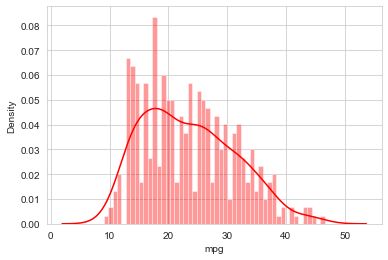

In [16]:
# set the background style of the plot
sns.set_style('whitegrid')

sns_plot = sns.distplot(df_cars["mpg"],kde=True, color='red',bins=50)

C:\Users\AbinSRajan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

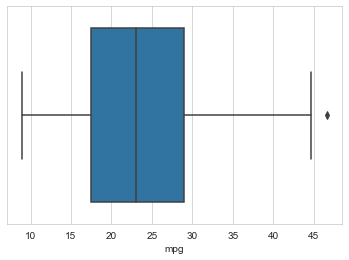

In [17]:
sns.boxplot(df_cars["mpg"])

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. ... While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

https://mode.com/blog/violin-plot-examples/

C:\Users\AbinSRajan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

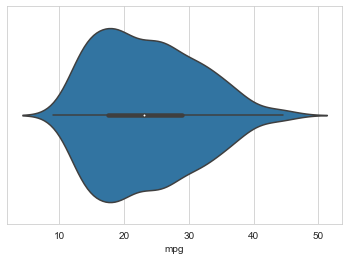

In [18]:
sns.violinplot(df_cars["mpg"])

Rugplot
It plots datapoints in an array as sticks on an axis.Just like a distplot it takes a single column. Instead of drawing a histogram it creates dashes all across the plot. If you compare it with the joinplot you can see that what a jointplot does is that it counts the dashes and shows it as bins.

<AxesSubplot:xlabel='mpg'>

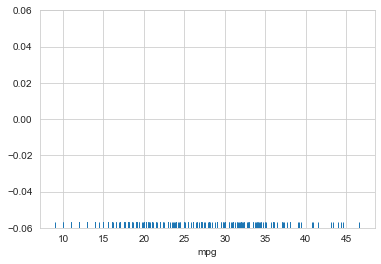

In [19]:
sns.rugplot(df_cars['mpg'])

########################################################
##############  Univariate - Categorical  ###############
########################################################

Countplot
A countplot basically counts the categories and returns a count of their occurrences. It is one of the most simple plots provided by the seaborn library.

<AxesSubplot:xlabel='origin', ylabel='count'>

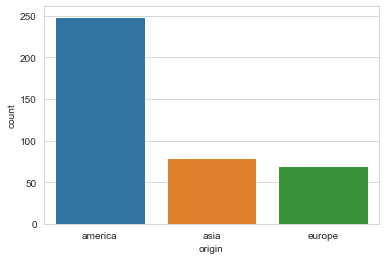

In [20]:
sns.countplot(x ='origin', data = df_cars)

Pie chart is a univariate analysis and are typically used to show percentage or proportional data. The percentage distribution of each class in a variable is provided next to the corresponding slice of the pie. The python libraries which could be used to build a pie chart is matplotlib and seaborn.

([<matplotlib.patches.Wedge at 0x1892bea38e0>,
 [Text(-0.42295633254055504, 1.015434853037773, 'america'),
  Text(-0.17293561388226758, -1.0863209808574827, 'asia'),
  Text(0.9363126752779499, -0.5773374871891209, 'europe')],
 [Text(-0.23070345411303, 0.5538735562024215, '62.6%'),
  Text(-0.09432851666305503, -0.5925387168313542, '19.8%'),
  Text(0.5107160046970636, -0.3149113566486114, '17.6%')])

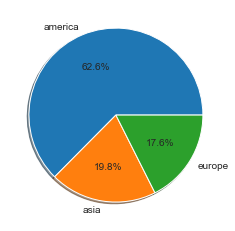

In [21]:
plt.pie(df_cars['origin'].value_counts(),labels=['america','asia','europe'],autopct='%1.1f%%',shadow=True)

##################################################################
########### Distributions of the variables/features. #############
##################################################################

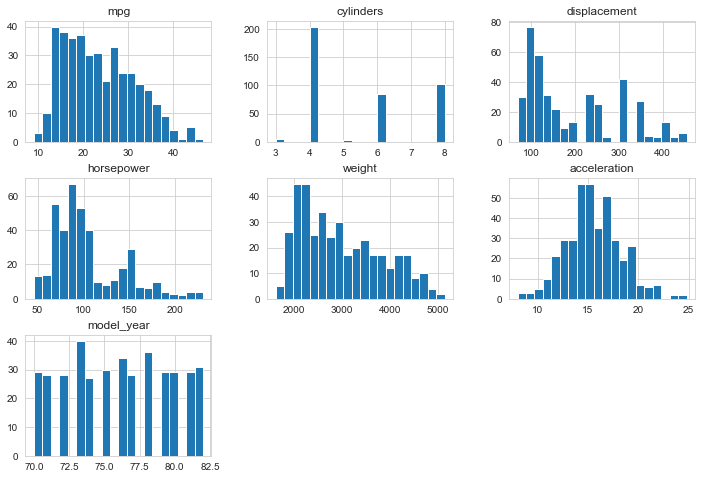

In [22]:
df_cars.hist(figsize=(12,8),bins=20)
plt.show()

########################################################
##############  Bivariate - Continuous  ###############
########################################################

Scatterplot: 
Scatterplot can be used with several semantic groupings which can help to understand well in a graph. They can plot two-dimensional graphics that can be enhanced by mapping up to three additional variables while using the semantics of hue, size, and style parameters. All the parameter control visual semantic which are used to identify the different subsets. Using redundant semantics can be helpful for making graphics more accessible.

https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/

<AxesSubplot:xlabel='mpg', ylabel='displacement'>

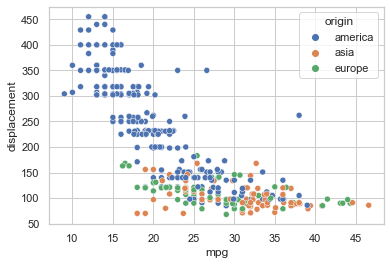

In [23]:
sns.set(style='whitegrid')
sns.scatterplot(x=df_cars['mpg'],y=df_cars['displacement'],hue=df_cars['origin'])

<AxesSubplot:xlabel='mpg', ylabel='displacement'>

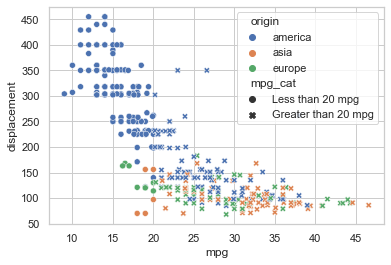

In [24]:
sns.set(style='whitegrid')
sns.scatterplot(x=df_cars['mpg'],y=df_cars['displacement'],hue=df_cars['origin'],style=df_cars['mpg_cat'])

Lineplot:
Visual representation of a dataset must be chosen according to the dataset or the type of answer we want from the plot. Scatter plots are highly preferred for visualizing statistical relationships. But when it comes to data which is varying with time (or continuous variable), scatter plots are not a good choice. Instead, in Seaborn, lineplot() or relplot() with kind = ‘line’ must be preferred. Line plots give annotation to each of the points and plus helps in customizing markers, line style, and legends.

https://www.geeksforgeeks.org/lineplot-using-seaborn-in-python/

<AxesSubplot:xlabel='mpg', ylabel='displacement'>

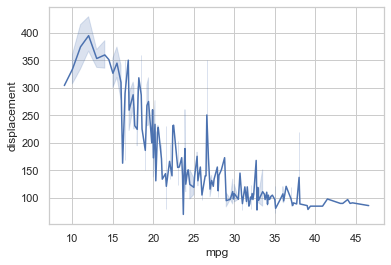

In [25]:
sns.lineplot(x="mpg", y="displacement", data=df_cars)

<AxesSubplot:xlabel='mpg', ylabel='displacement'>

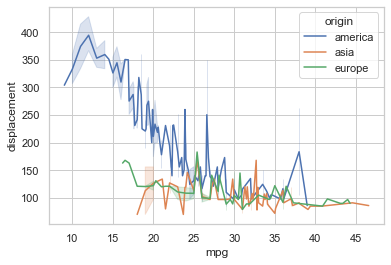

In [26]:
sns.lineplot(x="mpg", y="displacement", hue='origin',data=df_cars)

Joinplot
It is used to draw a plot of two variables with bivariate and univariate graphs. It basically combines two different plots.

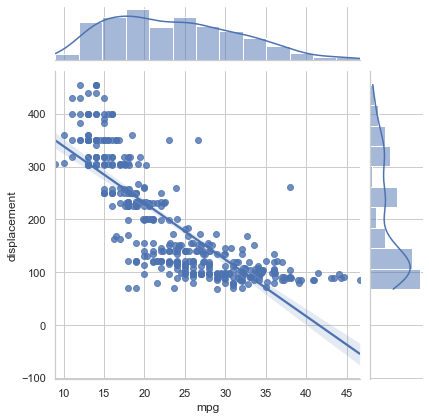

In [27]:
sns.jointplot(x ='mpg', y ='displacement', data = df_cars,kind='reg')

Pairplot
It represents pairwise relation across the entire dataframe and supports an additional argument called hue for categorical separation. What it does basically is create a jointplot between every possible numerical column and takes a while if the dataframe is really huge.

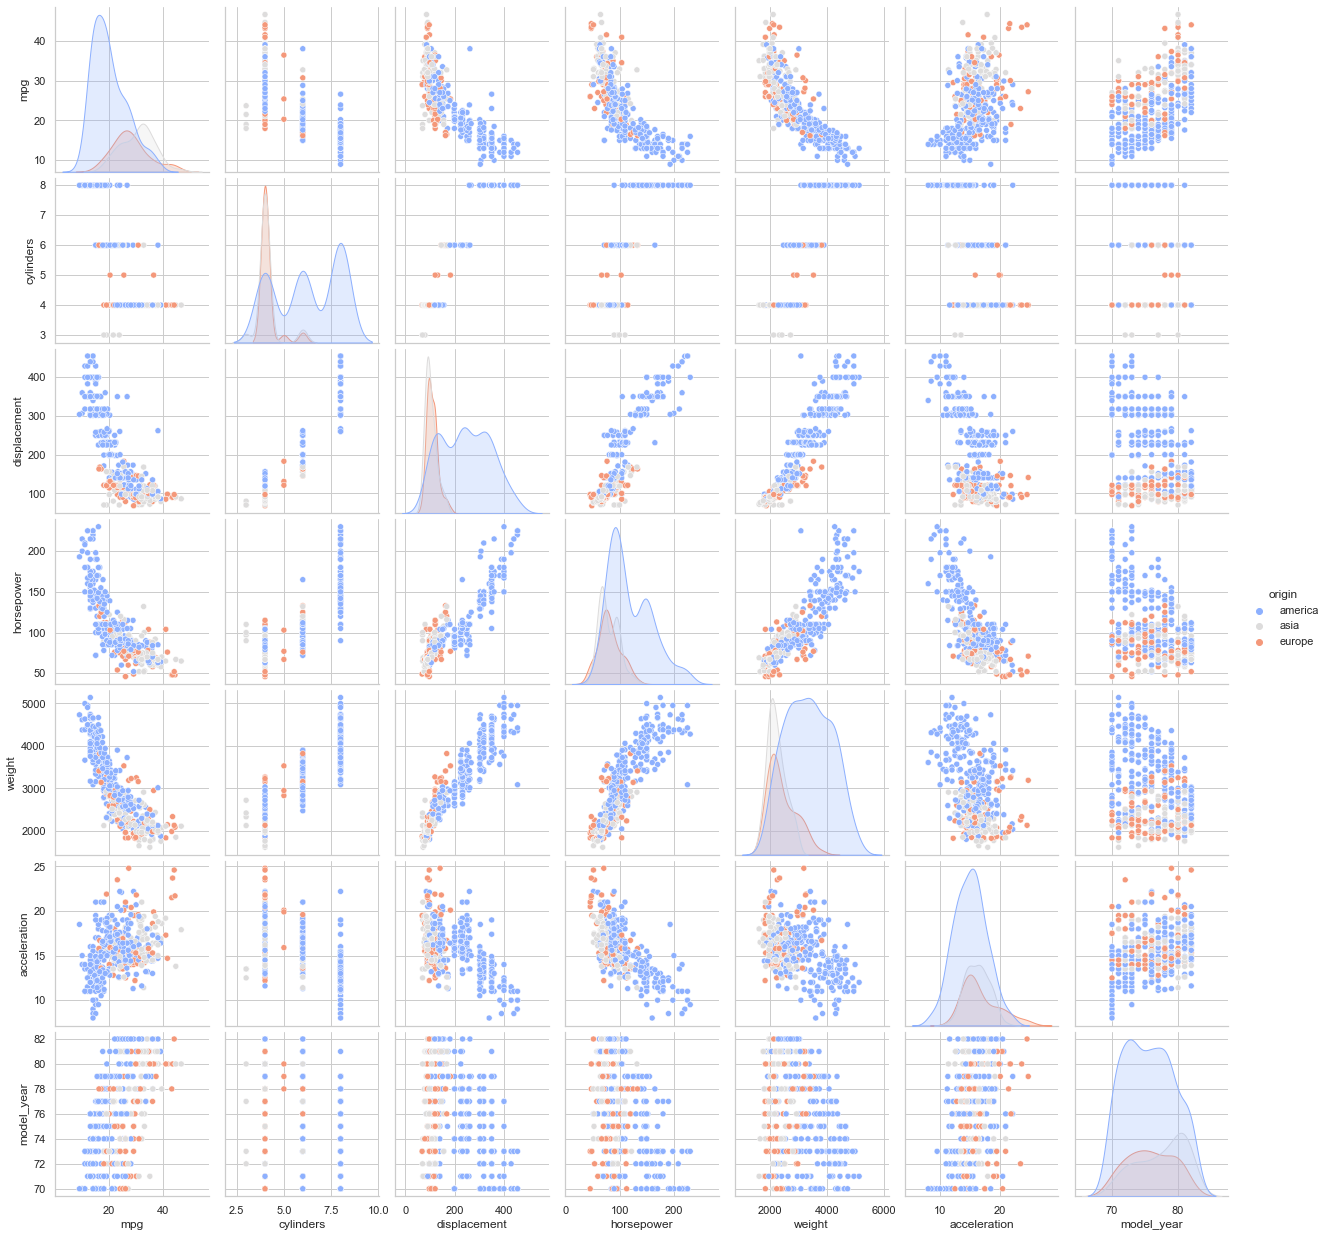

In [28]:
sns.pairplot(df_cars, hue ="origin", palette ='coolwarm')

####################################################################
##############  Bivariate - Categorical + Continuous ###############
####################################################################

Barplot
A barplot is basically used to aggregate the categorical data according to some methods and by default its the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x axis and a numerical column for the y axis and we see that it creates a plot taking a mean per categorical column. 

Explanation/Analysis 
Looking at the plot we can say that the average mpg for the asia is more as compared to the other orgins.
 
palette is used to set the color of the plot
 
estimator is used as a statistical function for estimation within each categorical bin.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

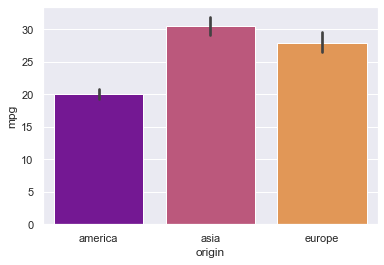

In [29]:
# set the backgroud style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='origin', y ='mpg', data = df_cars, palette ='plasma')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

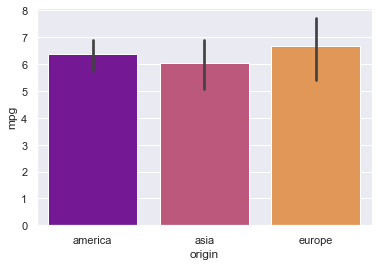

In [30]:
# change the estimator from mean to standard devaition
sns.barplot(x ='origin', y ='mpg', data = df_cars,
            palette ='plasma', estimator = np.std)

Boxplot
A boxplot is sometimes known as the box and whisker plot.It shows the distribution of the quantitative data that represents the comparisons between variables. boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution i.e. the dots indicating the presence of outliers.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

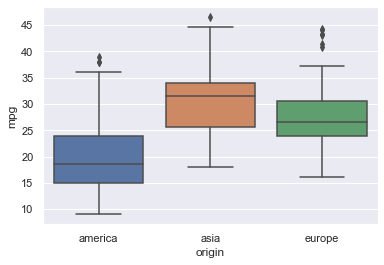

In [31]:
sns.boxplot(x ='origin', y ='mpg', data = df_cars)

Swarmplot
It is very similar to the stripplot except the fact that the points are adjusted so that they do not overlap.Some people also like combining the idea of a violin plot and a stripplot to form this plot. One drawback to using swarmplot is that sometimes they dont scale well to really large numbers and takes a lot of computation to arrange them. So in case we want to visualize a swarmplot properly we can plot it on top of a violinplot.

<AxesSubplot:xlabel='mpg_cat', ylabel='mpg'>

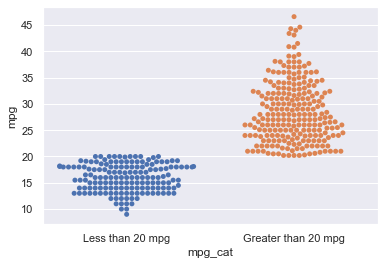

In [32]:
sns.swarmplot(x ='mpg_cat', y ='mpg', data = df_cars)

<AxesSubplot:xlabel='mpg_cat', ylabel='mpg'>

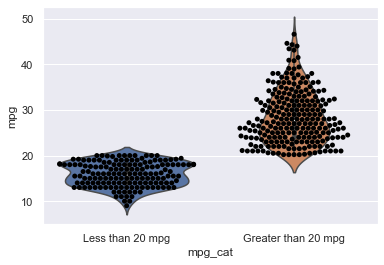

In [33]:
sns.violinplot(x ='mpg_cat', y ='mpg', data = df_cars)
sns.swarmplot(x ='mpg_cat', y ='mpg', data = df_cars, color ='black')

Factorplot
It is the most general of all these plots and provides a parameter called kind to choose the kind of plot we want thus saving us from the trouble of writing these plots separately. The kind parameter can be bar, violin, swarm etc.

C:\Users\AbinSRajan\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


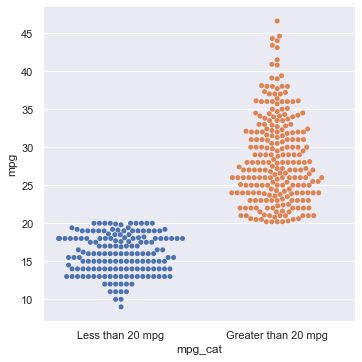

In [34]:
sns.factorplot(x ='mpg_cat', y ='mpg', data = df_cars, kind ='swarm')

In [35]:
#######################################################################
##############  Multivariate - Categorical + Continuous ###############
#######################################################################

<AxesSubplot:xlabel='origin', ylabel='mpg'>

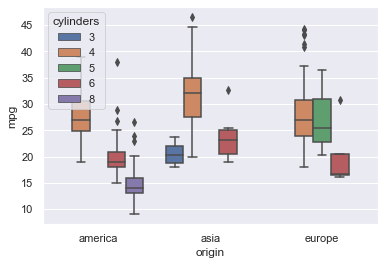

In [36]:
sns.boxplot(x ='origin', y ='mpg', data = df_cars, hue ='cylinders')

Violinplot
It is similar to the boxplot except that it provides a higher, more advanced visualization and uses the kernel density estimation to give a better description about the data distribution. 

Explanation/Analysis – 
 
hue is used to separate the data further using the sex category
 
setting split=True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

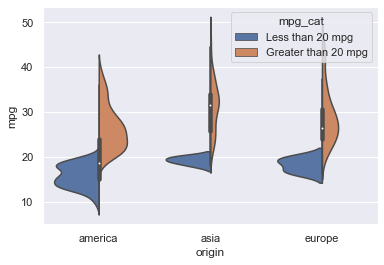

In [37]:
sns.violinplot(x ='origin', y ='mpg', data = df_cars, hue ='mpg_cat', split = True)

Stripplot
It basically creates a scatter plot based on the category.

<AxesSubplot:xlabel='mpg_cat', ylabel='displacement'>

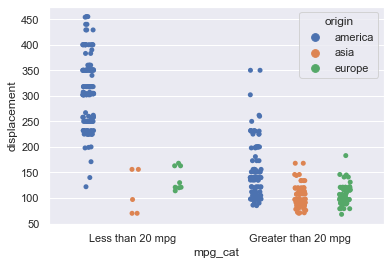

In [38]:
sns.stripplot(x ='mpg_cat', y ='displacement', data = df_cars,
              jitter = True, hue ='origin', dodge = True)

#########################################################
############## Correlation Matrix - heatmap #############
#########################################################

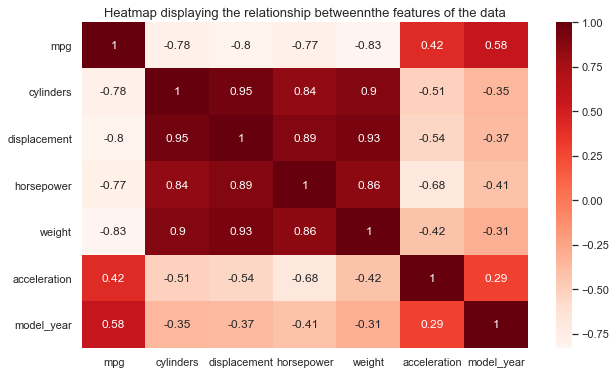

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()